# Analyse synthesis outputs

In [1]:
%matplotlib notebook

import numpy as np
from matplotlib import pyplot as plt
import glob
from importlib import reload

import scatcovjax.Sphere_lib as sphlib
from scatcovjax.Scattering_lib import scat_cov_axi, scat_cov_dir
from s2wav.filter_factory.filters import filters_directional_vectorised

import s2fft
import s2wav
import scatcovjax.plotting as plot

plot.notebook_plot_format()


# Parameters

In [9]:
reality = True
sampling = 'mw'
multiresolution = True
L = 350
N = 3
epochs = 1000
J_min = 0

J = s2wav.utils.shapes.j_max(L)
print(J)

9


# Make filters

<IPython.core.display.Javascript object>


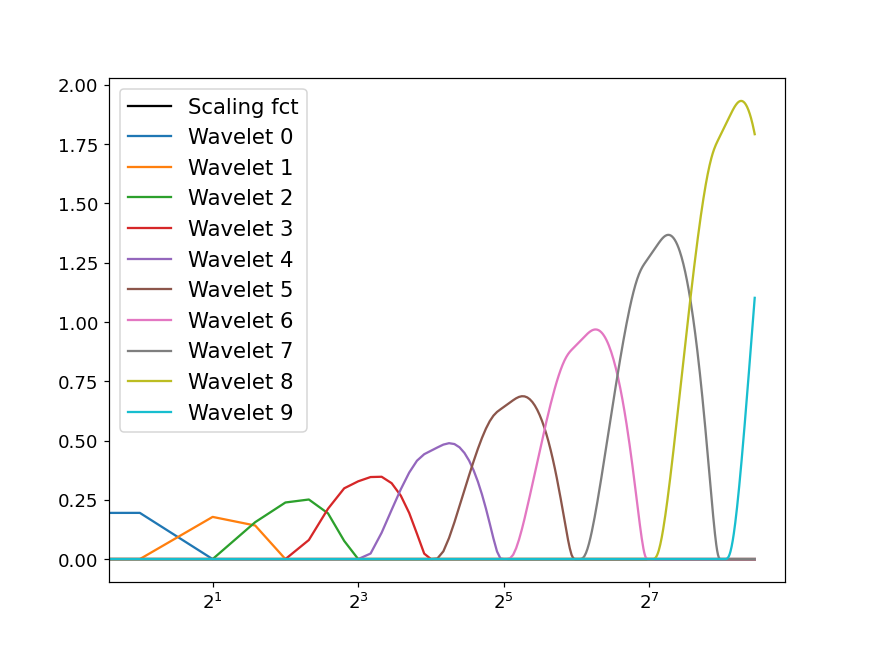

(<Figure size 800x600 with 1 Axes>, <Axes: >)

In [10]:
filters = filters_directional_vectorised(L, N, J_min)
plot.plot_filters(filters, real=True, m=L-1)

# Load the data

In [11]:
# List of job with these parameters
job_list = glob.glob(f'../scripts/outputs/*L{L}_N{N}_epochs{epochs}')
print(job_list)

# Choose the run
run = 0
output_dir = job_list[run]
print(output_dir)

# flm
flm_target = np.load(output_dir + '/flm_target.npy')
flm_start = np.load(output_dir + '/flm_start.npy')
flm_end = np.load(output_dir + '/flm_end.npy')
print(flm_end.shape)

# Loss
loss_history = np.load(output_dir + '/loss.npy')

# Coeffs
tmean, tvar, tS1, tP00, tC01, tC11 = np.load(output_dir + '/coeffs_target.npy', allow_pickle=True)
smean, svar, sS1, sP00, sC01, sC11 = np.load(output_dir + '/coeffs_start.npy', allow_pickle=True)
emean, evar, eS1, eP00, eC01, eC11 = np.load(output_dir + '/coeffs_end.npy', allow_pickle=True)

['../scripts/outputs/Job6066_L350_N3_epochs1000']
../scripts/outputs/Job6066_L350_N3_epochs1000
(350, 350)


In [12]:
tP00

Array([6.30087050e-07, 6.30087050e-07, 6.30087050e-07, 6.30087050e-07,
       6.30087050e-07, 3.47184813e-06, 2.57998856e-06, 3.71981874e-06,
       2.57542240e-06, 2.80377363e-06, 2.66730241e-05, 3.94625512e-05,
       3.13847687e-05, 3.13185201e-05, 3.94466533e-05, 3.37889087e-04,
       2.81341281e-04, 2.94069319e-04, 3.30718144e-04, 2.71839244e-04,
       1.14790302e-03, 1.20319936e-03, 1.11312907e-03, 1.30628883e-03,
       1.05629574e-03, 4.53688345e-03, 4.05086745e-03, 4.29949337e-03,
       4.42863819e-03, 3.97874895e-03, 1.21065932e-02, 1.18679490e-02,
       1.18978337e-02, 1.16659674e-02, 1.20656301e-02, 2.97462328e-02,
       2.94635472e-02, 2.93581732e-02, 2.93564423e-02, 3.00093964e-02,
       4.12107589e-02, 3.94499166e-02, 4.02639127e-02, 3.99476438e-02,
       3.96353928e-02, 1.44727902e-03, 1.41378175e-03, 1.42765342e-03,
       1.40643660e-03, 1.42869229e-03], dtype=float64)

In [13]:
if reality:  # Get the full flm
    flm_target = sphlib.make_flm_full(flm_target, L)
    flm_start = sphlib.make_flm_full(flm_start, L)
    flm_end = sphlib.make_flm_full(flm_end, L)
print(flm_end.shape)

(350, 699)


In [14]:
# Make the maps
f_target = s2fft.inverse_jax(flm_target, L, reality=reality)
f_start = s2fft.inverse_jax(flm_start, L, reality=reality)
f_end = s2fft.inverse_jax(flm_end, L, reality=reality)

# Plots

<IPython.core.display.Javascript object>


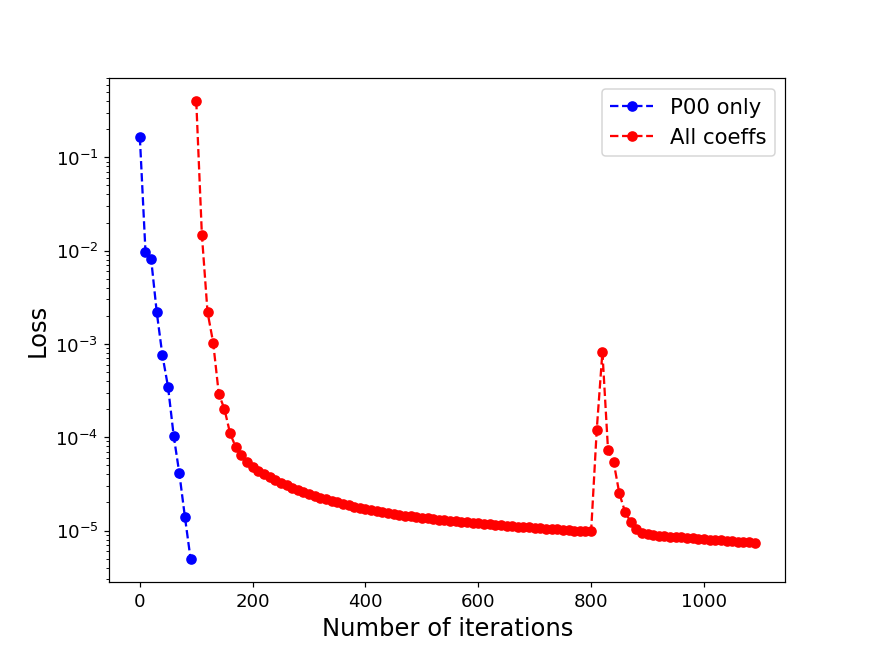

In [17]:
nit1 = 100
nit2 = 1000
step = 10

plt.figure(figsize=(8, 6))
plt.plot(np.arange(0, nit1, step), loss_history[:int(nit1/step)], 'bo--', label='P00 only')
plt.plot(np.arange(nit1, nit1 + nit2, step), loss_history[int(nit1/step):], 'ro--', label='All coeffs')
#plt.plot(loss_history, 'bo--')
plt.yscale('log')
plt.ylabel('Loss')
plt.xlabel('Number of iterations')
plt.legend()

<IPython.core.display.Javascript object>


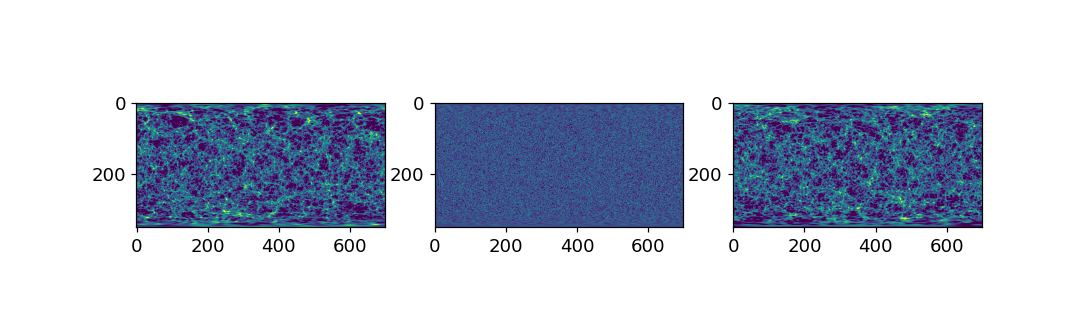

In [18]:
mn, mx = np.nanmin(f_target), np.nanmax(f_target)
mn, mx = -1, 3

fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(10,3))
ax1.imshow(f_target, vmax=mx, vmin=mn, cmap='viridis')
ax2.imshow(f_start, vmax=mx, vmin=mn, cmap='viridis')
ax3.imshow(f_end, vmax=mx, vmin=mn, cmap='viridis')
plt.show()

In [19]:
print(np.std(f_target), np.std(f_start))

1.0000000000000429 0.7080273291742296


<IPython.core.display.Javascript object>


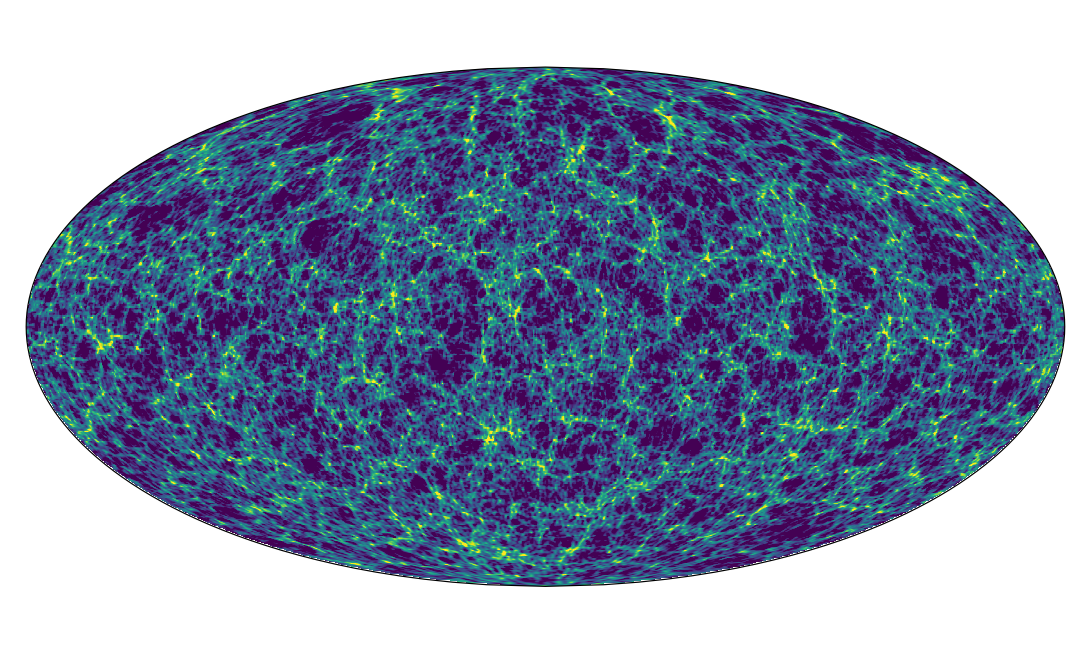

In [28]:
reload(plot)
plot.plot_map_MW_Mollweide(f_target, vmin=mn, vmax=mx, figsize=(10, 6), title='')#, title=f'Target - {mn=:.2f}, {mx=:.2f}')

<IPython.core.display.Javascript object>


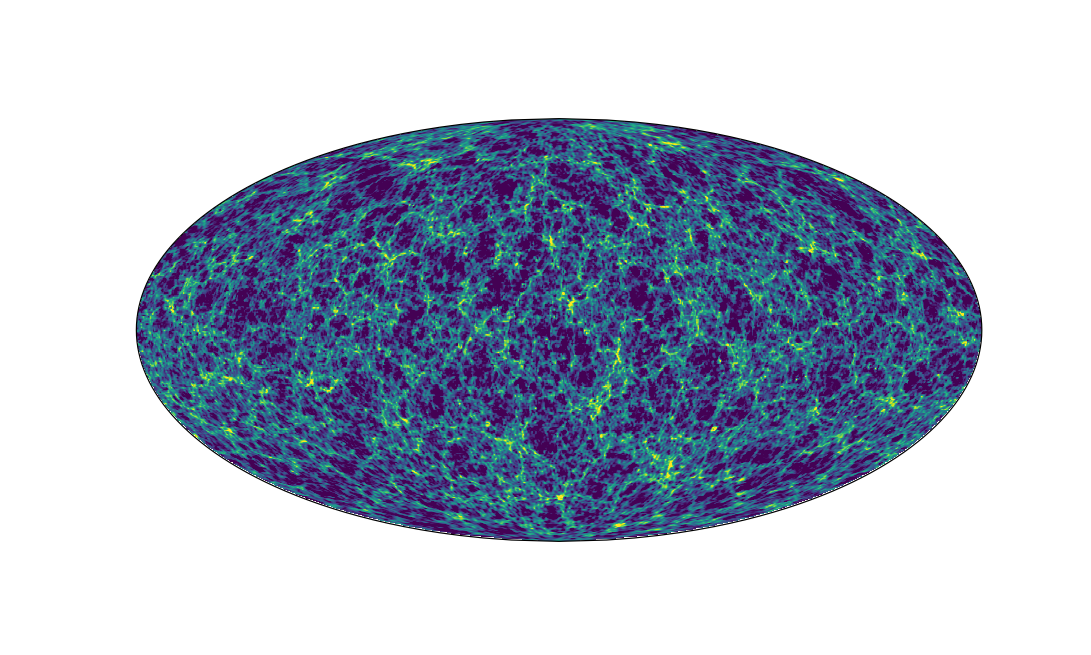

In [25]:
plot.plot_map_MW_Mollweide(f_end, vmin=mn, vmax=mx, figsize=(10, 6), title='')#, title=f'End - {mn=:.2f}, {mx=:.2f}')

<IPython.core.display.Javascript object>


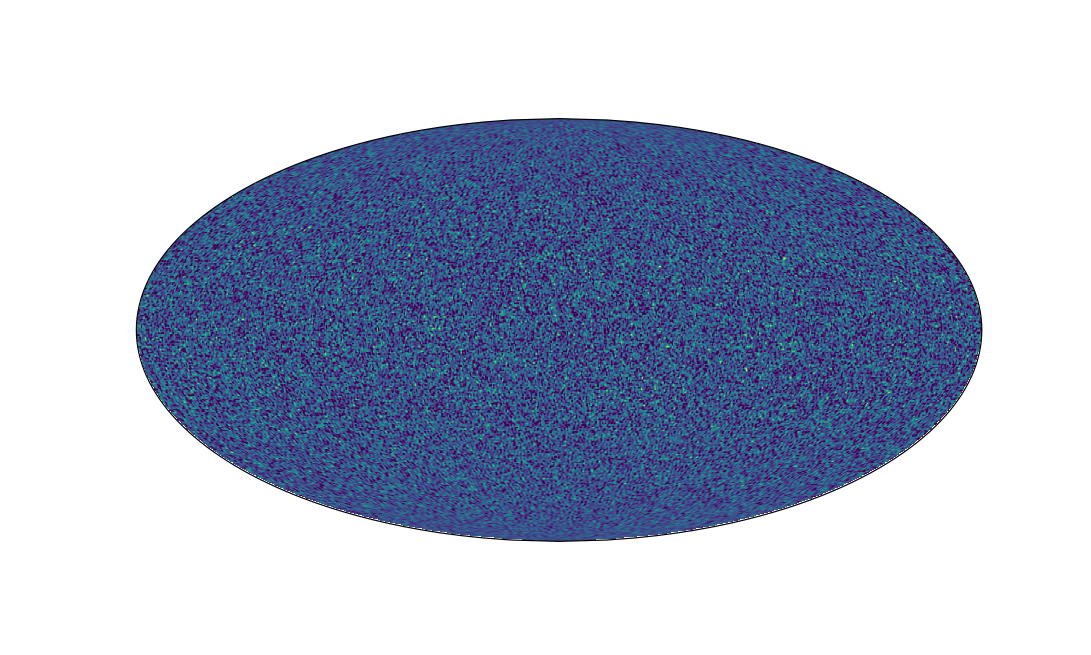

In [26]:
plot.plot_map_MW_Mollweide(f_start, vmin=mn, vmax=mx, title='', figsize=(10, 6))#title=f'Start - {mn=:.2f}, {mx=:.2f}')

In [18]:
# plot.plot_sphere(f_end, L, sampling=sampling)

### Power spectrum

<IPython.core.display.Javascript object>


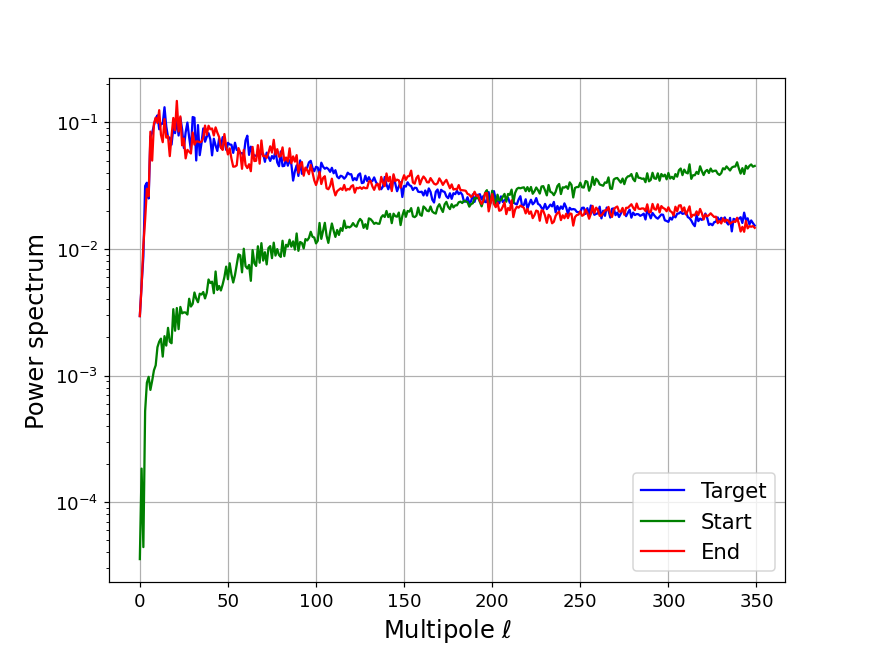

In [19]:
ps_target = sphlib.compute_ps(flm_target)
ps_start = sphlib.compute_ps(flm_start)
ps_end = sphlib.compute_ps(flm_end)

plt.figure(figsize=(8, 6))
plt.plot(ps_target, 'b', label="Target")
plt.plot(ps_start, 'g', label="Start")
plt.plot(ps_end, 'r', label="End")
plt.yscale("log")
plt.xlabel(r'Multipole $\ell$')
plt.ylabel('Power spectrum')
plt.grid()
#plt.xlim(2, 256)
#plt.ylim(1e-4, 1)
plt.legend()

In [20]:
print('Mean:', tmean, smean, emean)
print('Var:', tvar, svar, evar)

Mean: 0.01532441867223427 0.001680300908726098 0.015322286434726277
Var: 0.9961843513268649 0.6179887464694965 0.981005981102525


<IPython.core.display.Javascript object>


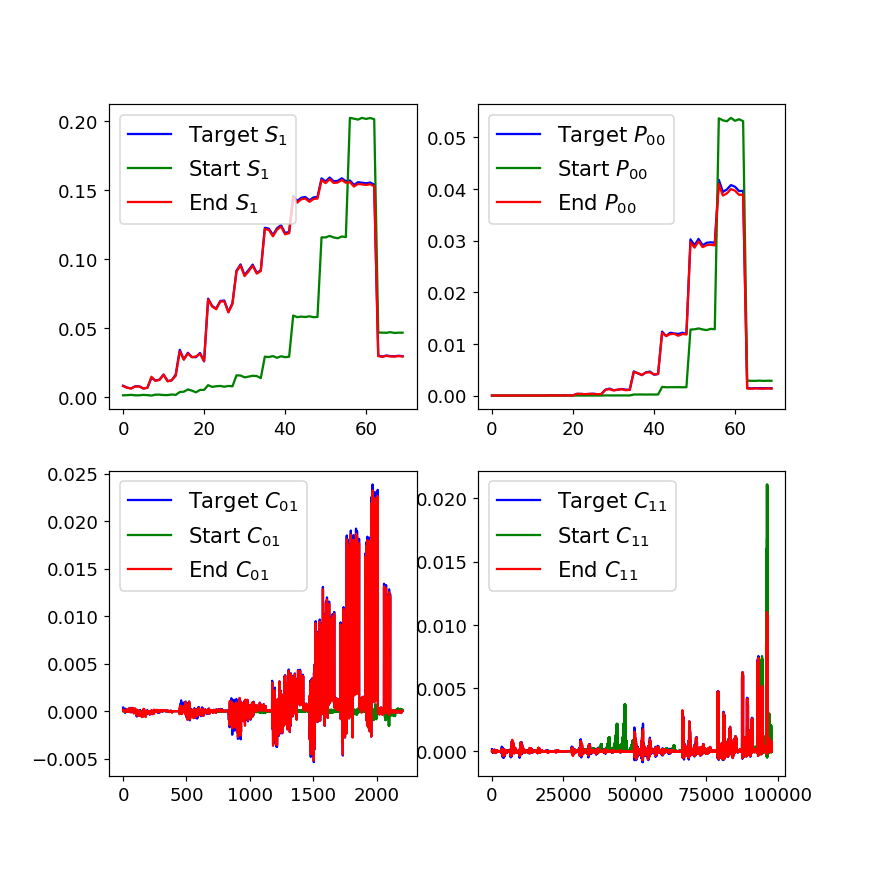

In [22]:
plot.plot_scatcov_coeffs(tS1, tP00, tC01, tC11, name='Target', hold=True, color='blue')

plot.plot_scatcov_coeffs(sS1, sP00, sC01, sC11, name='Start', hold=False, color='green')

plot.plot_scatcov_coeffs(eS1, eP00, eC01, eC11, name='End', hold=False, color='red')